In [1]:
import numpy as np
import itertools

In [2]:
v = np.array([1, 2, 3, 4])
layer1 = np.array([[1, 0, 0, 0], [0, 0, 1, 0], [0, 1, 0, 0], [0, 0, 0, 1]])
layer1 @ v

array([1, 3, 2, 4])

In [3]:
v = np.arange(1, 9)

In [4]:
def make_permutation_matrix(source_vector, target_vector):
    if not isinstance(source_vector, np.ndarray):
        source_vector = np.array(source_vector)
    if not isinstance(target_vector, np.ndarray):
        target_vector = np.array(target_vector)
    n = len(source_vector)
    A = np.zeros(shape=(n, n))
    for j, elem in enumerate(source_vector):
        i = np.where(target_vector == elem)[0][0]
        A[i, j] = 1
    return A

make_permutation_matrix([1, 2, 3, 4, 5, 6, 7, 8], [1, 3, 2, 4, 5, 7, 6, 8])

array([[1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.]])

In [5]:
make_permutation_matrix([1, 2, 3, 4, 5, 6, 7, 8], [1, 3, 2, 4, 5, 7, 6, 8])

array([[1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.]])

In [6]:
def make_target_vector(n: int, layer: int):
    assert np.log2(n).is_integer()
    target_vector = np.zeros(n)
    for i in range(n):
        if i % 2 == 0:
            for j in range(n):
                if j not in target_vector:
                    target_vector[i] = j
                    break
        else:
            target_vector[i] = target_vector[i - 1] + 2 ** layer
    return [int(elem) for elem in target_vector]

In [7]:
target_vector = make_target_vector(16, 3)
make_permutation_matrix(np.arange(1, 16 + 1), target_vector)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [8]:
def network_sort(A: list[int]):
    n = len(A)
    num_layers = np.log2(n)
    assert num_layers.is_integer()
    layers = {layer: [None] * n for layer in np.arange(num_layers)}
    layers[0] = A
    for layer in np.arange(1, num_layers):
        pass







In [9]:
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout

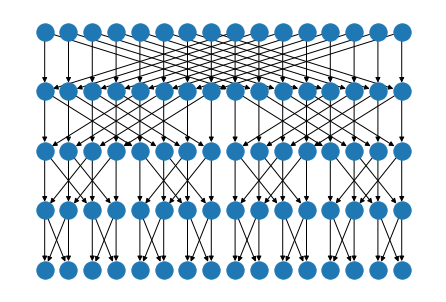

In [16]:
def make_butterfly_network(n: int):
    num_layers = np.log2(n)
    assert num_layers.is_integer()
    num_layers = int(num_layers)
    n = n // 2

    butterfly_network = nx.DiGraph()

    # create nodes and positions
    pos = {}
    for i in range(num_layers):
        for j in range(n):
            node = (i, j)
            pos[node] = (j, -i)
            butterfly_network.add_node(node)

    # create edges
    for i in range(num_layers - 1):
        k = 0
        offset = n // (2 ** (i + 1))
        multiplier = 1
        for j in range(n):
            n1 = (i, j)
            n2 = (i + 1, j + multiplier * offset)
            butterfly_network.add_edge(n1, n2)
            butterfly_network.add_edge(n1, (i + 1, j))
            if k == offset - 1:
                multiplier *= -1
                k = 0
            else:
                k += 1

    return butterfly_network, pos

butterfly_network, pos = make_butterfly_network(32)
nx.draw(butterfly_network, pos=pos, with_labels=False, arrows=True)

In [11]:
butterfly_network.__dict__

{'graph_attr_dict_factory': dict,
 'node_dict_factory': dict,
 'node_attr_dict_factory': dict,
 'adjlist_outer_dict_factory': dict,
 'adjlist_inner_dict_factory': dict,
 'edge_attr_dict_factory': dict,
 'graph': {},
 '_node': {(0, 0): {},
  (0, 1): {},
  (0, 2): {},
  (0, 3): {},
  (0, 4): {},
  (0, 5): {},
  (0, 6): {},
  (0, 7): {},
  (1, 0): {},
  (1, 1): {},
  (1, 2): {},
  (1, 3): {},
  (1, 4): {},
  (1, 5): {},
  (1, 6): {},
  (1, 7): {},
  (2, 0): {},
  (2, 1): {},
  (2, 2): {},
  (2, 3): {},
  (2, 4): {},
  (2, 5): {},
  (2, 6): {},
  (2, 7): {},
  (3, 0): {},
  (3, 1): {},
  (3, 2): {},
  (3, 3): {},
  (3, 4): {},
  (3, 5): {},
  (3, 6): {},
  (3, 7): {}},
 '_adj': {(0, 0): {(1, 4): {}, (1, 0): {}},
  (0, 1): {(1, 5): {}, (1, 1): {}},
  (0, 2): {(1, 6): {}, (1, 2): {}},
  (0, 3): {(1, 7): {}, (1, 3): {}},
  (0, 4): {(1, 0): {}, (1, 4): {}},
  (0, 5): {(1, 1): {}, (1, 5): {}},
  (0, 6): {(1, 2): {}, (1, 6): {}},
  (0, 7): {(1, 3): {}, (1, 7): {}},
  (1, 0): {(2, 2): {}, (2, 0):

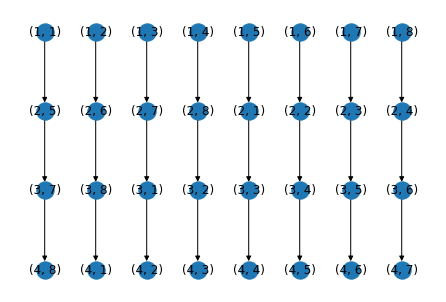

In [12]:
def build_butterfly_network(n: int):
    num_layers = np.log2(n)
    assert num_layers.is_integer()
    num_layers = int(num_layers)

    butterfly_network = nx.DiGraph()
    nodes = []
    for layer in range(1, num_layers + 2):
        for index in range(1, n + 1):
            nodes.append((layer, index))

    edges = []
    for layer in range(1, num_layers + 1):
        offset = n / (2 ** layer)
        for index1 in range(1, n + 1):
            n1 = (layer, index1)
            index2 = (index1 + offset) % n
            if index2 == 0:
                index2 = n
            n2 = (layer + 1, int(index2))
            edges.append((n1, n2))

    for node in nodes:
        butterfly_network.add_node(node, pos=node)
    butterfly_network.add_edges_from(edges)
    return butterfly_network

butterfly_network = build_butterfly_network(8)
pos = graphviz_layout(butterfly_network, prog='dot')
nx.draw(butterfly_network, pos, with_labels=True, arrows=True)